<a href="https://colab.research.google.com/github/naveenrajan/Colab/blob/master/Oakland_A's_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import numpy as np
drive.mount('/content/drive/')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
df=pd.read_excel('drive/My Drive/Colab Notebooks/Oakland A Data 1.xlsx',
                 sheet_name='Attendance Data')

In [3]:
df.head

<bound method NDFrame.head of     NUMBER    TIX  OPP  POS  GB  DOW  TEMP  ...  O7  O8  O9  O10  O11  O12  O13
0        1  24415    2    5   1    4    57  ...   0   0   0    0    0    0    0
1        2   5729    2    3   1    5    66  ...   0   0   0    0    0    0    0
2        3   5783    2    7   1    6    64  ...   0   0   0    0    0    0    0
3        4   6300    2    5   1    7    62  ...   0   0   0    0    0    0    0
4        5   5260    1    7   2    1    60  ...   0   0   0    0    0    0    0
..     ...    ...  ...  ...  ..  ...   ...  ...  ..  ..  ..  ...  ...  ...  ...
70      71   3836    8    2  14    3    69  ...   0   1   0    0    0    0    0
71      72   3180    8    2  14    4    64  ...   0   1   0    0    0    0    0
72      73   5099    6    2  14    5    64  ...   0   0   0    0    0    0    0
73      74   4581    6    2  13    6    62  ...   0   0   0    0    0    0    0
74      75  10662    6    2  12    7    65  ...   0   0   0    0    0    0    0

[75 rows 

In [4]:
df.columns

Index(['NUMBER', 'TIX', 'OPP', 'POS', 'GB', 'DOW', 'TEMP', 'PREC', 'TOG', 'TV',
       'PROMO', 'NOBEL', 'YANKS', 'WKEND', 'OD', 'DH', 'O1', 'O2', 'O3', 'O4',
       'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13'],
      dtype='object')

In [5]:
#All columns in dataset
X=df[['POS', 'GB', 'DOW', 'TEMP', 'PREC', 'TOG', 'TV','PROMO', 'NOBEL', 'YANKS', 'WKEND', 'OD', 'DH', 'O1', 'O2', 'O3', 'O4','O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13']]
y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           2.72e-12
Time:                        07:17:56   Log-Likelihood:                -727.23
No. Observations:                  75   AIC:                             1504.
Df Residuals:                      50   BIC:                             1562.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.158e+04   2.06e+04      1.533      0.1

In [6]:
X=df[['POS','GB','PREC','DH','NOBEL','TOG','PROMO','YANKS']]

y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     20.51
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           3.38e-15
Time:                        07:17:56   Log-Likelihood:                -747.80
No. Observations:                  75   AIC:                             1514.
Df Residuals:                      66   BIC:                             1534.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8545.9153   2594.549      3.294      0.0

In [7]:
X=df[['POS','GB','PREC','DH','TOG','PROMO','YANKS']]

y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     23.52
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           8.68e-16
Time:                        07:17:56   Log-Likelihood:                -748.11
No. Observations:                  75   AIC:                             1512.
Df Residuals:                      67   BIC:                             1531.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8516.4107   2585.518      3.294      0.0

In [8]:
X=df[['DH','DOW','PREC','TOG','PROMO','O1','O2','O3','O4','O5','O6','O7','O8','O9','O10','O11','O12','O13','YANKS']]

y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     11.50
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           9.77e-13
Time:                        07:17:56   Log-Likelihood:                -738.83
No. Observations:                  75   AIC:                             1514.
Df Residuals:                      57   BIC:                             1555.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4565.9041   3262.164      1.400      0.1

In [9]:
X=df[['PREC','TEMP','PROMO','O1','O2','O3','O4','O5','O6','O7','O8','O9','O10','O11','O12','O13','NOBEL','OD','DH']]
y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     12.67
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           1.00e-13
Time:                        07:17:56   Log-Likelihood:                -733.74
No. Observations:                  75   AIC:                             1505.
Df Residuals:                      56   BIC:                             1550.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.988e+04   1.37e+04      1.452      0.1

In [10]:
X=df[['NOBEL']]
y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4294
Date:                Sun, 27 Sep 2020   Prob (F-statistic):              0.514
Time:                        07:17:56   Log-Likelihood:                -794.42
No. Observations:                  75   AIC:                             1593.
Df Residuals:                      73   BIC:                             1597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.086e+04   1271.632      8.540      0.0

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

X=df[['POS', 'GB', 'DOW', 'TEMP', 'PREC', 'TOG', 'TV','PROMO', 'NOBEL', 'YANKS', 'WKEND', 'OD', 'DH', 'O1', 'O2', 'O3', 'O4','O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13']]
y=df['TIX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


0 POS 0.0
1 GB 0.0
2 DOW 0.20202541489667913
3 TEMP 0.010561958629559776
4 PREC 0.019591836734694335
5 TOG 0.0
6 TV 0.0
7 PROMO 0.0
8 NOBEL 0.0
9 YANKS 0.2583995374448327
10 WKEND 0.04390212432208007
11 OD 0.0
12 DH 0.02001736864958703
13 O1 0.055416933790727985
14 O2 0.021620058653430085
15 O3 0.0
16 O4 0.2583995374448327
17 O5 0.0027879927976224295
18 O6 0.0
19 O7 0.026501282972466678
20 O8 0.012007828198405956
21 O9 0.0
22 O10 0.006258503401360471
23 O11 0.0
24 O12 0.0
25 O13 0.0


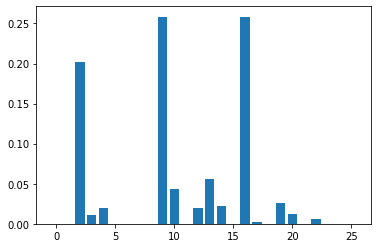

In [12]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print(i,X.columns[i], fs.scores_[i])
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [13]:
X=df[['DOW','TEMP','PREC','WKEND','DH','YANKS']]
y=df['TIX']

X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIX   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     24.57
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           2.85e-15
Time:                        07:17:56   Log-Likelihood:                -751.40
No. Observations:                  75   AIC:                             1517.
Df Residuals:                      68   BIC:                             1533.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.625e+04   1.32e+04      1.984      0.0

In [14]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn import linear_model 
from sklearn.pipeline import Pipeline

X=df[['POS', 'GB', 'DOW', 'TEMP', 'PREC', 'TOG', 'TV','PROMO', 'NOBEL', 'YANKS', 'WKEND', 'OD', 'DH', 'O1', 'O2', 'O3', 'O4','O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13']]
y=df['TIX']

# create pipeline
rfe = RFE(estimator=linear_model.LinearRegression(), n_features_to_select=10)
model = linear_model.LinearRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -4613.476 (1590.980)


In [15]:
# summarize all features
rfe.fit(X,y)
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 13.000
Column: 1, Selected False, Rank: 16.000
Column: 2, Selected False, Rank: 7.000
Column: 3, Selected False, Rank: 15.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 9.000
Column: 6, Selected False, Rank: 10.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 12.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 8.000
Column: 15, Selected False, Rank: 2.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 17.000
Column: 18, Selected False, Rank: 5.000
Column: 19, Selected False, Rank: 4.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 14.000
Column: 23, Selected False, Rank: 11.000
Column: 24, Selected False, Rank: 3.000
Column: 25,

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Define dictionary to store our rankings

ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [17]:
colnames = df.columns

# Construct our Linear Regression model
lr = linear_model.LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [18]:
print(ranks["RFE"])

{'NUMBER': 0.16, 'TIX': 0.04, 'OPP': 0.4, 'POS': 0.08, 'GB': 0.64, 'DOW': 0.32, 'TEMP': 0.28, 'PREC': 0.8, 'TOG': 0.2, 'TV': 1.0, 'PROMO': 0.44, 'NOBEL': 0.92, 'YANKS': 0.84, 'WKEND': 0.72, 'OD': 0.36, 'DH': 0.6, 'O1': 0.96, 'O2': 0.0, 'O3': 0.48, 'O4': 0.52, 'O5': 0.68, 'O6': 0.88, 'O7': 0.12, 'O8': 0.24, 'O9': 0.56, 'O10': 0.76}


In [19]:
sort=(sorted(ranks["RFE"].items(), key = 
             lambda kv:(kv[1], kv[0])))
print(sort)

[('O2', 0.0), ('TIX', 0.04), ('POS', 0.08), ('O7', 0.12), ('NUMBER', 0.16), ('TOG', 0.2), ('O8', 0.24), ('TEMP', 0.28), ('DOW', 0.32), ('OD', 0.36), ('OPP', 0.4), ('PROMO', 0.44), ('O3', 0.48), ('O4', 0.52), ('O9', 0.56), ('DH', 0.6), ('GB', 0.64), ('O5', 0.68), ('WKEND', 0.72), ('O10', 0.76), ('PREC', 0.8), ('YANKS', 0.84), ('O6', 0.88), ('NOBEL', 0.92), ('O1', 0.96), ('TV', 1.0)]
